# Data Collecting

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [138]:
data=pd.read_csv("forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# EDA and Preprocesing

In [84]:
data.shape

(517, 13)

In [85]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [86]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [87]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001722C34A6C8>,
      dtype=object)

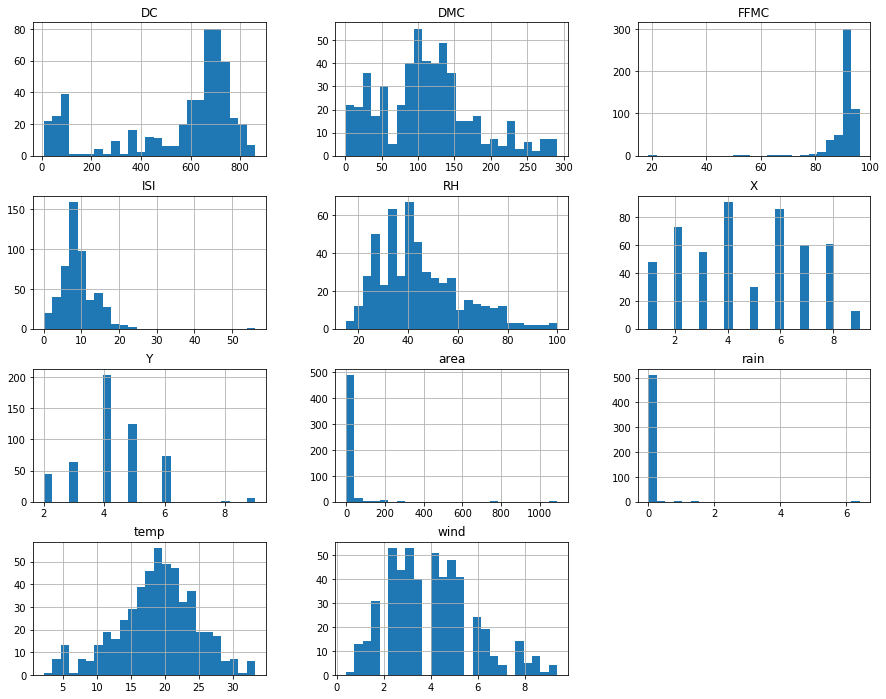

In [88]:
data.hist(bins=25, figsize=(15,12))

area is rght skewed

In [74]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


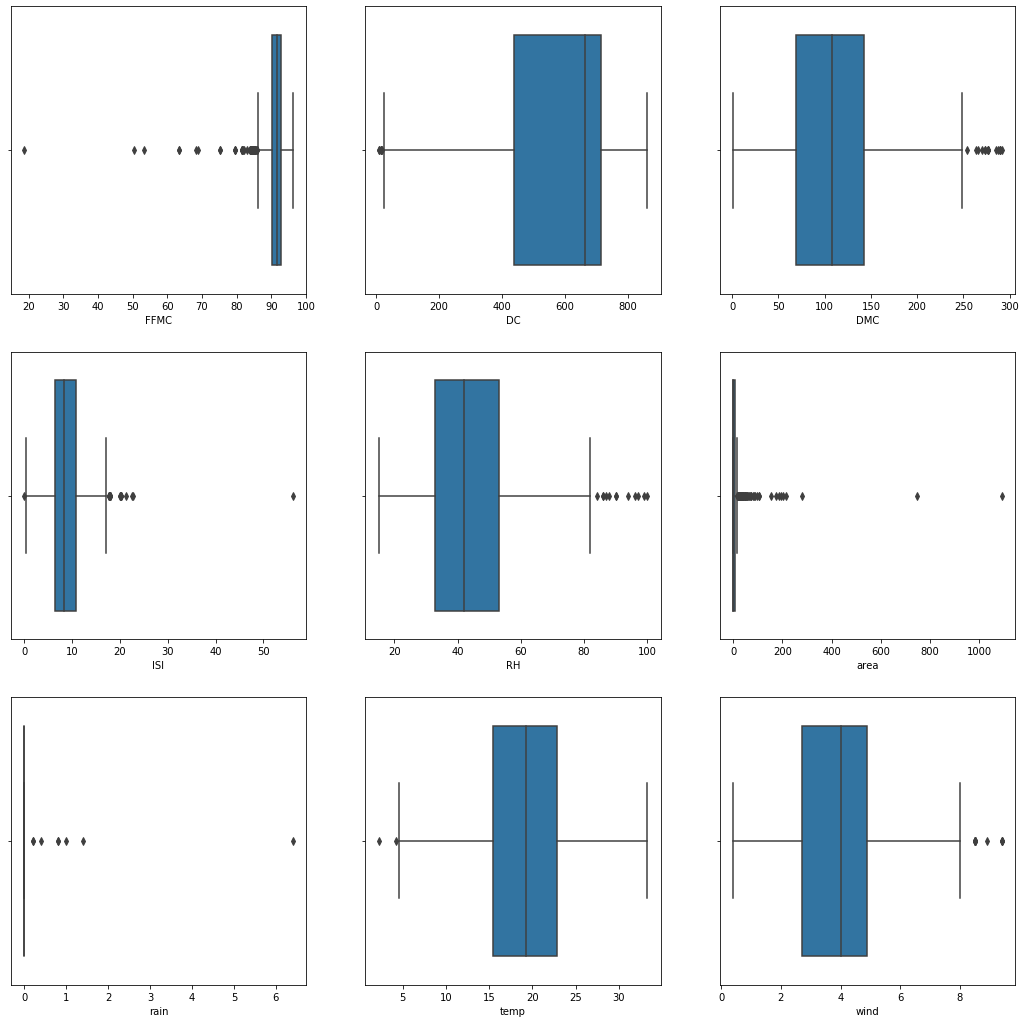

In [33]:
#Out lier treament
import seaborn as sns

fig, axs = plt.subplots(3,3, figsize = (18,18))

sns.boxplot(data.FFMC, ax = axs[0][0])
sns.boxplot(data.DC, ax = axs[0][1])
sns.boxplot(data.DMC, ax = axs[0][2])

sns.boxplot(data.ISI, ax = axs[1][0])
sns.boxplot(data.RH, ax = axs[1][1])
sns.boxplot(data.area, ax = axs[1][2])

sns.boxplot(data.rain, ax = axs[2][0])
sns.boxplot(data.temp, ax = axs[2][1])
sns.boxplot(data.wind, ax = axs[2][2])


plt.tight_layout
plt.show()


In [35]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [89]:
#Chi Square test
df=pd.crosstab(data.month,data.day)
df

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


In [90]:
import scipy.stats
scipy.stats.chi2_contingency(df)

(64.2383177767438,
 0.5384475410453669,
 66,
 array([[ 1.47969052,  1.28820116,  1.4622824 ,  1.65377176,  1.06189555,
          1.11411992,  0.94003868],
        [30.25145068, 26.33655706, 29.89555126, 33.81044487, 21.7098646 ,
         22.77756286, 19.21856867],
        [ 1.47969052,  1.28820116,  1.4622824 ,  1.65377176,  1.06189555,
          1.11411992,  0.94003868],
        [ 3.28820116,  2.86266925,  3.24951644,  3.67504836,  2.35976789,
          2.47582205,  2.08897485],
        [ 0.32882012,  0.28626692,  0.32495164,  0.36750484,  0.23597679,
          0.24758221,  0.20889749],
        [ 5.26112186,  4.58027079,  5.19922631,  5.88007737,  3.77562863,
          3.96131528,  3.34235977],
        [ 2.79497099,  2.43326886,  2.76208897,  3.1237911 ,  2.00580271,
          2.10444874,  1.77562863],
        [ 8.87814313,  7.72920696,  8.77369439,  9.92263056,  6.37137331,
          6.68471954,  5.64023211],
        [ 0.32882012,  0.28626692,  0.32495164,  0.36750484,  0.23597679,
 

In [131]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [139]:
#Converting month name into month number
from time import strptime
data['month']=list(map(lambda x:strptime(x,'%b').tm_mon,data['month']))
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [140]:
#Converting day name into day number
from time import strptime
data['day']=list(map(lambda x:strptime(x,'%a').tm_wday,data['day']))
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [141]:
cr=data.corr()
cr

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [144]:
cr=data.corr(method='pearson')
corr_variables=[]

for i in cr.columns:
    for j in cr.columns:
        if i!=j:
            if cr[i][j]>0.9:
                corr_variables.append([i,j])
          
corr_variables

[]

In [143]:
cr.area

X        0.063385
Y        0.044873
month    0.056496
day      0.023226
FFMC     0.040122
DMC      0.072994
DC       0.049383
ISI      0.008258
temp     0.097844
RH      -0.075519
wind     0.012317
rain    -0.007366
area     1.000000
Name: area, dtype: float64

In [58]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,9,5,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [145]:
#data preprocessing

X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [147]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
y_pred=LR.predict(X_test)
y_pred

array([  3.5762785 ,  10.9746433 ,   0.17967946,   7.79084001,
        10.98338182,   2.01402008,  19.00863709,   8.30081346,
        12.86145758,  19.77835569,  11.51375361,   3.14387523,
        -1.17650155,   9.22426839,  20.96881129,   4.45196956,
        11.92454938,   8.53451222,  25.40636931,   6.09113489,
        20.14721013,  -1.20757363,   2.37257002,  22.24362837,
        16.57913686,  14.84058402,  12.01120065,  19.66940201,
        18.40066631,  11.16001336,   9.45419999,   6.50777467,
        15.38223012,   4.81184795,  13.68951941,   4.1125551 ,
         8.60705225,  17.24405135,   7.26033833,  20.06237252,
        11.2484646 ,   1.17532154,  22.19926496,   5.82948176,
        18.87182729,  11.49501265,   0.80123787,  16.56953332,
         3.34367973,   3.83250665,  28.70762987,  22.38005691,
        25.02061764,  19.82863455,  24.13771721,  16.47139699,
        13.92777097,  22.18236378,  18.75667543,  14.30777422,
         7.16296144,   3.45684161,  25.30980999,   8.55

In [149]:
LR.score(X_train,y_train)

0.017503377724215285

In [150]:
import statsmodels.api as sm
x1=sm.add_constant(X)
sm.OLS(y,x1).fit().summary()

C:\Users\reshw\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.032
Date:                Tue, 10 Mar 2020   Prob (F-statistic):              0.418
Time:                        15:25:23   Log-Likelihood:                -2874.2
No. Observations:                 517   AIC:                             5774.
Df Residuals:                     504   BIC:                             5830.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7844     63.445     -0.217      0.828    -138.433     110.864
X              1.9653      1.451      1.355      0.176      -0.885       4.815
Y              0.2782      2.755      0.101      0.920      -5.135       5.691
month          2.7380      2.787      0.983      0.326      -2.737       8.213
day            0.7551      1.383      0.546      0.585      -1.962       3.472
FFMC          -0.0662      0.664     -0.100      0.921      -1.370       1.238
DMC            0.0976      0.071      1.381      0.168      -0.041       0.236
DC            -0.0297      0.032     -0.926      0.355      -0.093       0.033
ISI           -0.7296      0.772     -0.945      0.345      -2.247       0.788
temp           0.8566      0.803      1.066      0.287      -0.721       2.435
RH            -0.2148      0.242     -0.887      0.375      -0.690       0.261
wind           1.1851      1.707      0.694      0.488      -2.168       4.539
rain          -2.9358      9.721     -0.302      0.763     -22.034      16.162
==============================================================================
Omnibus:                      974.736   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779225.268
Skew:                          12.562   Prob(JB):                         0.00
Kurtosis:                     191.525   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestRegressor(n_estimators=90, random_state=1, bootstrap=True)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

0.8645005591609681

In [152]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
lin_mse=mse(y_pred,y_test)
lin_rmse=np.sqrt(lin_mse)
print('Liner Regression RMSE:%.4f' %lin_rmse)

Liner Regression RMSE:75.8993
